# Section 1, project 1

##### Angélica María Narváez Vias
##### Catalina Jaramillo Villalba

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style 

style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('C://Users//cataj//Google Drive//Doctorado//Machine learning//Project 1//casesBrazil.csv')

### Plotting days vs data

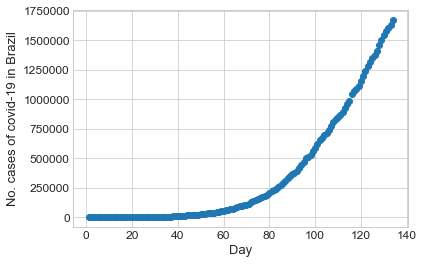

In [3]:
plt.scatter(data['day'],data['cases'])
plt.xlabel('Day',fontsize=13)
plt.ylabel('No. cases of covid-19 in Brazil',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Cost Function

In [4]:
def computeCost(X,y, theta):
    
    m = len(y) #numer of examples
    h = X.dot(theta) # hipotheses function 
    #J = (1/(2*m))*np.sum((h-y)**2)
    J2 = (1/(2*m))*(h-y).T.dot(h-y)
    # print(J2[0][0])
    return J2[0][0]
    

In [5]:
def gradientDescent(X,y,theta,alpha,n_iter=100):
    J_history= []
    m = len(y)
    for i in range(n_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m)*(X.T.dot(h-y))
        J_history.append(computeCost(X,y,theta))
        
    return(theta, J_history)

# Suppose $h(x)= \theta_0+\theta_1 x+\theta_x^2+\dots +\theta_n x^n$

#### Matrix X of features feated to polynomial degree n

In [6]:
def matriX(X,n):
    for i in range(n):
        if i==0:
            # append by left
            X = np.append((X**i).reshape(m,1),X.reshape(m,1), axis=1)
        else:
            #append by right 
            X = np.append(X,(X[:,1]**(i+1)).reshape(m,1), axis=1)    
    return X

#### Scaling X matrix

In [7]:
def scalingMatrix(X):
    Z = (X.min())*np.ones(X.shape)
    newX = (1/(X.max()-X.min()))*(X - Z)
    return(newX)    

In [8]:
def scalingVector(X):
    newX= (1/X.max())*X
    return(newX)


### Extracting data and creating the matrix X according to features where hypotheses function of linear regression is a polynomial degree n. 

### Scaling matrix 

In [23]:
X,y = data['day'].to_numpy(), data['cases'].to_numpy()
m = X.shape[0]
y = y.reshape(m,1)

# polynomial degree n
n = 10
X = scalingVector(X)

# scaling vector
X = matriX(X.astype(np.float64),n)

# initial theta
theta = np.zeros([n+1,1])

In [24]:
# learning rates
alphas = [1,0.3,0.1,0.03,0.01,0.003,0.001]

J_s = []
thetas = []

#Number of iterations
n_iter = 1500

# # learning rate
# alpha = 0.091

for i in alphas:
    new_theta, J_history = gradientDescent(X,y,theta,i,n_iter)
    thetas.append(new_theta)
    J_s.append(J_history)    

In [25]:
# #Number of iterations
# n_iter = 2000
# # learning rate
# alpha = 0.091
# new_theta, J_history = gradientDescent(X,y,theta,alpha,n_iter)

### Plotting linear regression with polynomial degree n and real data

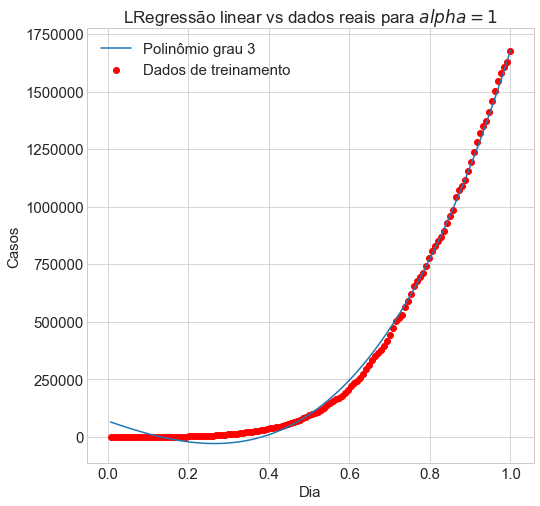

In [13]:
# Graphic for alpha= 1
fig = plt.figure(figsize=(8,8))
plt.plot(X[:,1], np.dot(X, thetas[0]),label='Polynomial degree %i'%n)
plt.scatter(X[:,1],y, c='red',label='Training data')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Cases',size=15)
plt.xlabel('Day',size=15)
plt.legend()
plt.title('Linear regression vs Actual data with $alpha=1$',size=17)
plt.xticks(size=15)
plt.legend(fontsize=15)
plt.yticks(size=15)
plt.show()

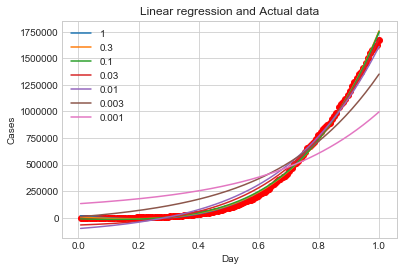

In [193]:
fig = plt.figure()
for i in range(len(alphas)):
    plt.plot(X[:,1], np.dot(X, thetas[i]))
plt.scatter(X[:,1],y, c='red',label='Training data')
plt.ylabel('Cases')
plt.xlabel('Day')
plt.legend()
plt.title('Linear regression and Real data')
plt.legend([alphas[i] for i in range(len(alphas))])
plt.show()

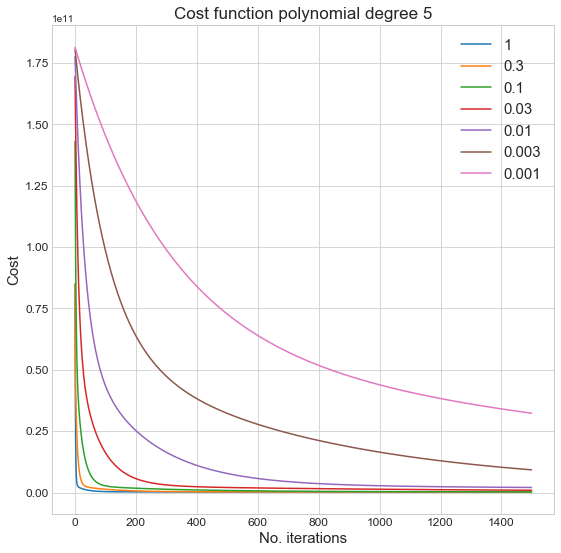

In [195]:
##Plot cost function history

z=range(len(J_s[0]))
fig = plt.figure(figsize=(9,9))
for i in range(len(alphas)):
    plt.plot(z,J_s[i], label= alphas[i])
plt.xlabel('No. iterations',size=15)
plt.ylabel('Cost',size=15)
plt.title('Cost function polynomial degree %i'%n,size=17)
plt.legend([alphas[i] for i in range(len(alphas))])
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
def prediction(day, new_theta):
    X= []
    for i in range(n+1):
        X.append(day**i)
    pred = np.dot(X,new_theta)
    return pred

In [23]:
predict1 = prediction(135, new_theta)
print('The predicted number of cases at day 135 is {}'.format(predict1[0]))

The predicted number of cases at day 135 is 3249279468120548.0


# Suppose $h(x)=\theta_0 e^{\theta_1 x_1}$

In [196]:
X,y = data['day'].to_numpy(), data['cases'].to_numpy()
m = X.shape[0]
y = y.reshape(m,1)
X = X.reshape(m,1)

newX = scalingVector(X)

logy = np.log(y)

theta = np.zeros([2,1])

newX = matriX(newX,1)

In [197]:
# learning rates
alphas = [1,0.3,0.1,0.03,0.01,0.003,0.001]

J_sexp = []
thetaexp = []

#Number of iterations
n_iter = 1500

for i in alphas:
    new_theta, J_history = gradientDescent(newX.astype(np.float64),logy.astype(np.float64),theta,i,n_iter)
    thetaexp.append(new_theta)
    J_sexp.append(J_history)    

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000., 16000000.]),
 <a list of 10 Text yticklabel objects>)

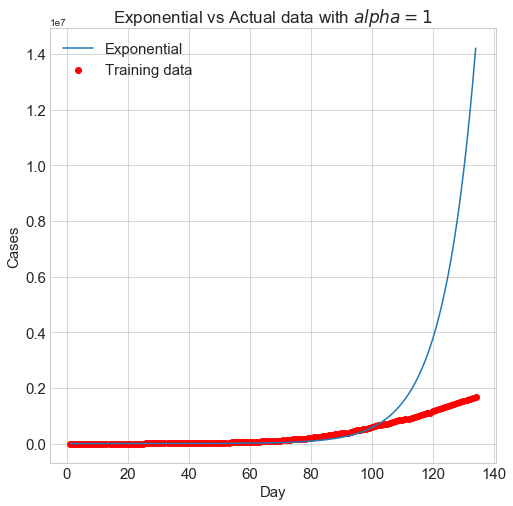

In [199]:
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0],y, c='red',label='Training data')
plt.plot(X[:,0], np.exp(np.dot(newX, thetaexp[0])), label='Exponential')
#plt.text(0.1, 12000000, "h(x)= exp( {} +{}x)".format(thetaexp[0][0], thetaexp[0][1]),size=15)
plt.ylabel('Cases',size=15)
plt.xlabel('Day',size=15)
plt.legend()
plt.title('Exponential vs Actual data with $alpha=1$',size=17)
plt.xticks(size=15)
plt.legend(fontsize=15)
plt.yticks(size=15)

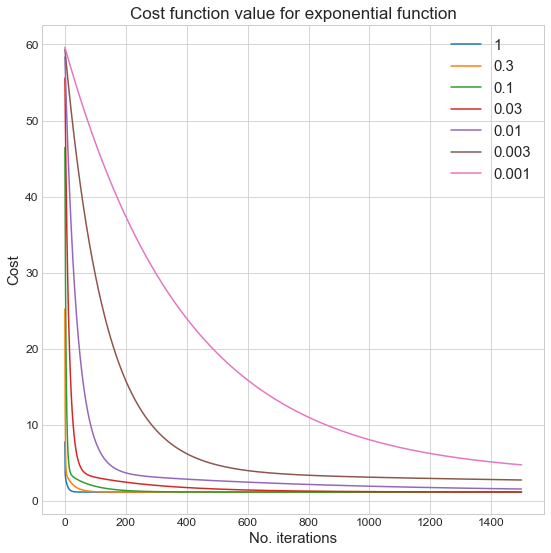

In [202]:
z=range(len(J_sexp[0]))
fig = plt.figure(figsize=(9,9))
for i in range(len(alphas)):
    plt.plot(z,J_sexp[i], label= alphas[i])
plt.xlabel('No. iterations',size=15)
plt.ylabel('Cost',size=15)
plt.title('Cost function value for exponential function',size=17)
plt.legend([alphas[i] for i in range(len(alphas))])
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [115]:
def exponentialPrediction(d,theta):    
    pred = np.exp(np.dot([1,d/X.max()], new_theta))
    return pred   

In [116]:
predict1 = exponentialPrediction(134, new_theta)
print('The predicted number of cases at day 135 is {}'.format(predict1[0]))

The predicted number of cases at day 135 is 69923.43551809361


### Analytic solution to exponential hypotheses function

$\theta = (X^TX)^{-1}X^Ty$

In [203]:
X = matriX(X.astype(np.float64),1)

In [207]:
theta = np.dot ( np.matmul( np.linalg.pinv( np.matmul(X.T,X)), X.T) ,logy)

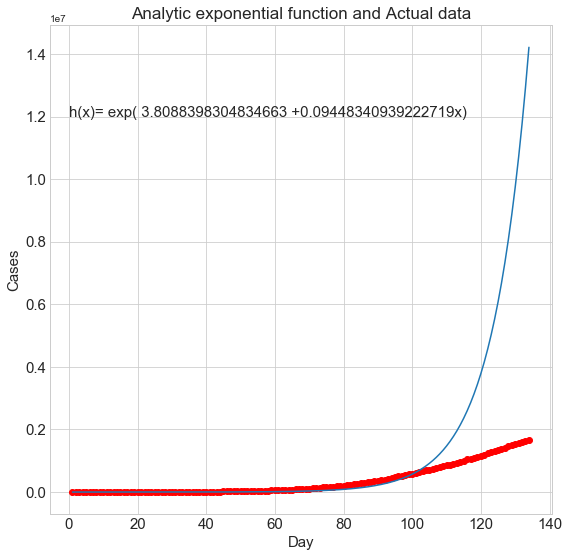

In [208]:
fig = plt.figure(figsize=(9,9))
plt.scatter(X[:,1],y, c='red')
plt.plot(X[:,1], np.exp(np.dot(X, theta)))
plt.text(0.1, 12000000, "h(x)= exp( {} +{}x)".format(theta[0][0], theta[1][0]),size=15)
plt.ylabel('Cases',size=15)
plt.xlabel('Day',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Analytic exponential function and Actual data',size=17)
plt.show()